<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/k2_pix_small.png">
*This notebook contains an excerpt instructional material from [gully](https://twitter.com/gully_) and the [K2 Guest Observer Office](https://keplerscience.arc.nasa.gov/); the content is available [on GitHub](https://github.com/gully/goldenrod).*


<!--NAVIGATION-->
< [goldenrod](02.01-SN_models.ipynb) | [Contents](Index.ipynb) | [goldenrod](02.03-SN_model-fits-Kepler_SN.ipynb) >

# goldenrod

## 2. Astrophysical models

### Part II: Model fits

Michael Gully-Santiago  
Wednesday, Aug 2, 2017

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [7]:
import astropy
import os
import pandas as pd
import seaborn as sns
from astropy.utils.console import ProgressBar
import everest

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
everest_path = '../../everest/everest/missions/k2/tables/'
df_kegs = pd.read_csv('../metadata/KEGS_TPF_metadata.csv')
c05_everest = pd.read_csv(everest_path + 'c05.stars', names=['EPIC_ID', 'KepMag', 'Channel', 'col4'])
kegs_everest_c05 = pd.merge(df_kegs, c05_everest, how='inner', left_on='KEPLERID', right_on='EPIC_ID')

In [11]:
star = everest.Everest(212593538)

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 212593538.


In [1]:
import sncosmo

In [14]:
model = sncosmo.Model(source='hsiao')

In [83]:
model.set(z=0, t0=2405., amplitude=1.e-4)

In [84]:
all_cadn = np.arange(0, len(star.cadn))
bad_mask = np.isin(all_cadn, star.mask)
good_mask = ~bad_mask

In [85]:
dat_time = star.time[good_mask]
dat_fraw = star.fraw[good_mask]

In [86]:
dat_time.shape

(3576,)

In [87]:
model1 = model.bandflux('kepler', dat_time)

In [88]:
gal_raw = model1*0.0+3750

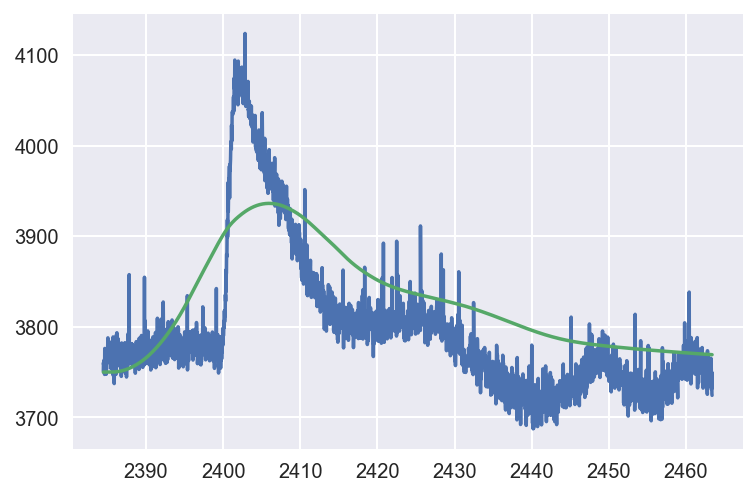

In [89]:
plt.plot(dat_time, dat_fraw)
plt.plot(dat_time, model1+gal_raw)

This event cannot be described by a traditional supernova model.

The end.

<!--NAVIGATION-->
< [goldenrod](02.01-SN_models.ipynb) | [Contents](Index.ipynb) | [goldenrod](02.03-SN_model-fits-Kepler_SN.ipynb) >